In [1]:
## Importing the required libraries for this project
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LassoCV
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier

In [2]:
## Loading the dataset
data = pd.read_csv('Amazon Customer Behavior Survey.csv')
data.head(10)

,Timestamp,age,Gender,Purchase_Frequency,Purchase_Categories,Personalized_Recommendation_Frequency,Browsing_Frequency,Product_Search_Method,Search_Result_Exploration,Customer_Reviews_Importance,...,Saveforlater_Frequency,Review_Left,Review_Reliability,Review_Helpfulness,Personalized_Recommendation_Frequency,Recommendation_Helpfulness,Rating_Accuracy,Shopping_Satisfaction,Service_Appreciation,Improvement_Areas
0,2023/06/04 1:28:19 PM GMT+5:30,23,Female,Few times a month,Beauty and Personal Care,Yes,Few times a week,Keyword,Multiple pages,1,...,Sometimes,Yes,Occasionally,Yes,2,Yes,1,1,Competitive prices,Reducing packaging waste
1,2023/06/04 2:30:44 PM GMT+5:30,23,Female,Once a month,Clothing and Fashion,Yes,Few times a month,Keyword,Multiple pages,1,...,Rarely,No,Heavily,Yes,2,Sometimes,3,2,Wide product selection,Reducing packaging waste
2,2023/06/04 5:04:56 PM GMT+5:30,24,Prefer not to say,Few times a month,Groceries and Gourmet Food;Clothing and Fashion,No,Few times a month,Keyword,Multiple pages,2,...,Rarely,No,Occasionally,No,4,No,3,3,Competitive prices,Product quality and accuracy
3,2023/06/04 5:13:00 PM GMT+5:30,24,Female,Once a month,Beauty and Personal Care;Clothing and Fashion;...,Sometimes,Few times a month,Keyword,First page,5,...,Sometimes,Yes,Heavily,Yes,3,Sometimes,3,4,Competitive prices,Product quality and accuracy
4,2023/06/04 5:28:06 PM GMT+5:30,22,Female,Less than once a month,Beauty and Personal Care;Clothing and Fashion,Yes,Few times a month,Filter,Multiple pages,1,...,Rarely,No,Heavily,Yes,4,Yes,2,2,Competitive prices,Product quality and accuracy
5,2023/06/04 6:01:59 PM GMT+5:30,21,Female,Less than once a month,Clothing and Fashion,No,Rarely,categories,Multiple pages,1,...,Never,No,Heavily,Yes,5,No,5,2,Wide product selection,Product quality and accuracy
6,2023/06/04 6:31:41 PM GMT+5:30,22,Female,Less than once a month,Clothing and Fashion,No,Rarely,Filter,Multiple pages,1,...,Rarely,No,Heavily,Yes,3,Sometimes,3,3,Wide product selection,Shipping speed and reliability
7,2023/06/04 7:13:12 PM GMT+5:30,21,Female,Few times a month,Beauty and Personal Care;Clothing and Fashion,No,Rarely,Keyword,Multiple pages,1,...,Rarely,No,Heavily,Sometimes,3,Sometimes,1,3,Competitive prices,Shipping speed and reliability
8,2023/06/04 7:23:21 PM GMT+5:30,20,Female,Less than once a month,Beauty and Personal Care;Clothing and Fashion,Sometimes,Few times a month,Keyword,First page,1,...,Often,No,Moderately,Yes,2,Yes,2,2,Wide product selection,Reducing packaging waste
9,2023/06/04 7:33:12 PM GMT+5:30,23,Female,Less than once a month,Beauty and Personal Care;Clothing and Fashion,No,Rarely,Keyword,Multiple pages,1,...,Rarely,No,Heavily,Yes,3,Yes,3,4,Wide product selection,Product quality and accuracy


In [3]:
# checking the columns in the dataset
data.columns

Index(['Timestamp', 'age', 'Gender', 'Purchase_Frequency',
       'Purchase_Categories', 'Personalized_Recommendation_Frequency',
       'Browsing_Frequency', 'Product_Search_Method',
       'Search_Result_Exploration', 'Customer_Reviews_Importance',
       'Add_to_Cart_Browsing', 'Cart_Completion_Frequency',
       'Cart_Abandonment_Factors', 'Saveforlater_Frequency', 'Review_Left',
       'Review_Reliability', 'Review_Helpfulness',
       'Personalized_Recommendation_Frequency ', 'Recommendation_Helpfulness',
       'Rating_Accuracy ', 'Shopping_Satisfaction', 'Service_Appreciation',
       'Improvement_Areas'],
      dtype='object')

In [4]:
# Checking the type of each column
data.dtypes

Timestamp                                 object
age                                        int64
Gender                                    object
Purchase_Frequency                        object
Purchase_Categories                       object
Personalized_Recommendation_Frequency     object
Browsing_Frequency                        object
Product_Search_Method                     object
Search_Result_Exploration                 object
Customer_Reviews_Importance                int64
Add_to_Cart_Browsing                      object
Cart_Completion_Frequency                 object
Cart_Abandonment_Factors                  object
Saveforlater_Frequency                    object
Review_Left                               object
Review_Reliability                        object
Review_Helpfulness                        object
Personalized_Recommendation_Frequency      int64
Recommendation_Helpfulness                object
Rating_Accuracy                            int64
Shopping_Satisfactio

In [5]:
# Checking for missing values
data.isnull().sum()

Timestamp                                 0
age                                       0
Gender                                    0
Purchase_Frequency                        0
Purchase_Categories                       0
Personalized_Recommendation_Frequency     0
Browsing_Frequency                        0
Product_Search_Method                     2
Search_Result_Exploration                 0
Customer_Reviews_Importance               0
Add_to_Cart_Browsing                      0
Cart_Completion_Frequency                 0
Cart_Abandonment_Factors                  0
Saveforlater_Frequency                    0
Review_Left                               0
Review_Reliability                        0
Review_Helpfulness                        0
Personalized_Recommendation_Frequency     0
Recommendation_Helpfulness                0
Rating_Accuracy                           0
Shopping_Satisfaction                     0
Service_Appreciation                      0
Improvement_Areas               

In [6]:
# Drppoing the missing values
amazon_data = data.dropna()


In [7]:
# Checking for missing values
amazon_data.isnull().sum()

Timestamp                                 0
age                                       0
Gender                                    0
Purchase_Frequency                        0
Purchase_Categories                       0
Personalized_Recommendation_Frequency     0
Browsing_Frequency                        0
Product_Search_Method                     0
Search_Result_Exploration                 0
Customer_Reviews_Importance               0
Add_to_Cart_Browsing                      0
Cart_Completion_Frequency                 0
Cart_Abandonment_Factors                  0
Saveforlater_Frequency                    0
Review_Left                               0
Review_Reliability                        0
Review_Helpfulness                        0
Personalized_Recommendation_Frequency     0
Recommendation_Helpfulness                0
Rating_Accuracy                           0
Shopping_Satisfaction                     0
Service_Appreciation                      0
Improvement_Areas               

##### Removed all the missing values from the dataset

In [58]:
# Creating a copy before label encoding for visualisation purpose
amazon_data1 = amazon_data.copy()


### EDA

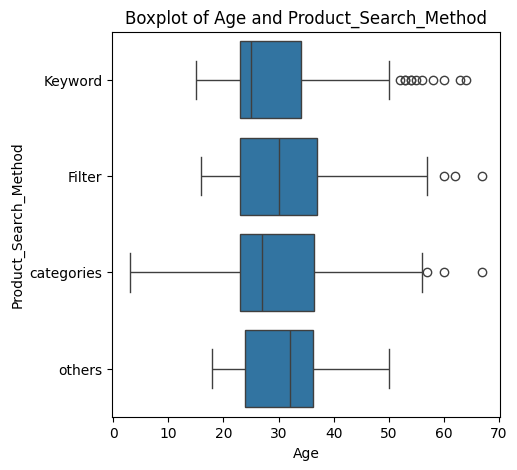

In [11]:
### Boxplot of Age and Product_Search_Method
plt.figure(figsize = (5,5))
sns.boxplot(x = 'age', y = 'Product_Search_Method', data = amazon_data1)
plt.xlabel('Age')
plt.ylabel('Product_Search_Method')
plt.title('Boxplot of Age and Product_Search_Method')
plt.show()

##### This boxplot categorizes Amazon customers based on their preferred method of searching for products and their age. The methods include using keywords, filters, categories, and other undefined methods. The median age of customers who prefer different search methods provides insights into the browsing behavior of various age groups. The plot suggests that those who searched using ‘Filter’ and  ‘Categories’ methods tend to fall between age of 25 to 35.

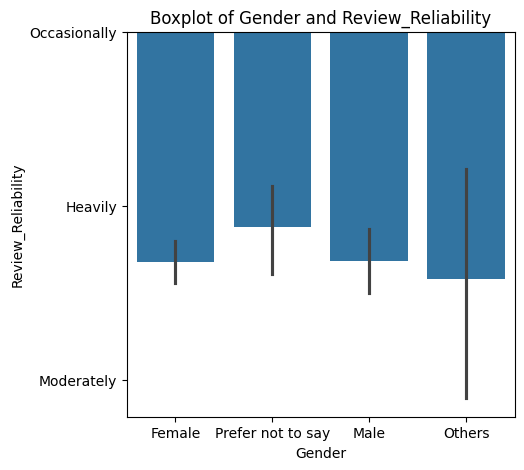

In [12]:
# Boxplot of Gender and Review_Reliability
plt.figure(figsize = (5,5))
sns.barplot(x = 'Gender', y = 'Review_Reliability', data = amazon_data1)
plt.xlabel('Gender')
plt.ylabel('Review_Reliability')
plt.title('Boxplot of Gender and Review_Reliability')
plt.show()

#####  It can be noticed from the boxplot that the reliability of reviews differs among gender categories. The categories "Female" and "Male" have higher median reliability compared to "Others." The categories "Prefer not to say" and "Others" have a wider range of perceptions concerning reliability. "Others" category has the widest range and the lowest median reliability.

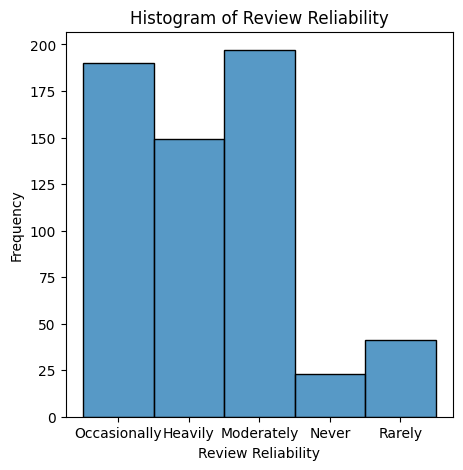

In [37]:
### Histogram Plot Review Reliability
plt.figure(figsize = (5,5))
sns.histplot(data=amazon_data1, x='Review_Reliability', bins=30)
plt.xlabel('Review Reliability')
plt.ylabel('Frequency')
plt.title('Histogram of Review Reliability')
plt.show()

##### The histogram displays the frequency of customers' perceived reliability of reviews, categorized as occasionally, heavily, moderately, never, and rarely. The high frequency of 'Occasionally' and 'Heavily' indicates that a significant number of customers find reviews to be generally reliable, while few customers find them 'Rarely' reliable.


## Pre-Processing the data

In [14]:
## Creating a list of categorical features in the dataset for label encoding
cols = ['Gender', 'Purchase_Frequency',
       'Purchase_Categories', 'Personalized_Recommendation_Frequency',
       'Browsing_Frequency', 'Product_Search_Method',
       'Search_Result_Exploration',
       'Add_to_Cart_Browsing', 'Cart_Completion_Frequency',
       'Cart_Abandonment_Factors', 'Saveforlater_Frequency', 'Review_Left',
       'Review_Reliability', 'Review_Helpfulness',
        'Recommendation_Helpfulness','Service_Appreciation',
       'Improvement_Areas']

# process columns, apply LabelEncoder to categorical features
for c in cols:
    lbl = LabelEncoder() 
    lbl.fit(list(amazon_data[c].values)) 
    amazon_data[c] = lbl.transform(list(amazon_data[c].values))

# shape       
print('Shape all_data: {}'.format(amazon_data.shape))

Shape all_data: (600, 23)


/var/folders/_n/zlsv0l8x3pdgl3y2ws_9tbfm0000gn/T/ipykernel_53945/3400494938.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  amazon_data[c] = lbl.transform(list(amazon_data[c].values))
/var/folders/_n/zlsv0l8x3pdgl3y2ws_9tbfm0000gn/T/ipykernel_53945/3400494938.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  amazon_data[c] = lbl.transform(list(amazon_data[c].values))
/var/folders/_n/zlsv0l8x3pdgl3y2ws_9tbfm0000gn/T/ipykernel_53945/3400494938.py:15: SettingWithCopyWarning: 
A value is trying to be se

### Spliting the dataset and choosing the appropriate output variable

#### The dataset is split into 80% train and 20% test data

In [15]:
# Dropping irrelevant columns
cols_to_drop = ['Timestamp','Shopping_Satisfaction']
X = amazon_data.drop(cols_to_drop, axis = 1)
Y = amazon_data['Shopping_Satisfaction']

# splitting dataset into 80% train and 20% test
X_train, X_test, y_train, y_test = train_test_split(X, Y, train_size=0.8, random_state=1)

### Feature Selection
### Using CV Lasso to find optimum alpha value

In [17]:
## Standardising the train and test X variables
scaler = StandardScaler()
X_train_scaled_LS2 = scaler.fit_transform(X_train)
X_val_scaled_LS2 = scaler.transform(X_test)

## Applying Lasso regression at alpha = 0.1
lasso = Lasso(alpha=0.1)
lasso.fit(X_train_scaled_LS2, y_train)

# AIC/BIC for Lasso
Y_pred2 = lasso.predict(X_train)

rss = np.sum((y_train - Y_pred2) ** 2)
n = len(y_train)
k = X_train.shape[1] + 1  # Number of parameters including the intercept

AICc = n * np.log( rss / n ) + 2 * k + (2 * k * (k + 1)) / (n - k - 1)
BIC = n * np.log( rss / n  ) + k * np.log(n)

print('AICc:', AICc)
print('BIC:',BIC)
#print(f'AICc: {AICc}, BIC: {BIC}')

### 5-fold CV ###

# Compared to cross validated performance
lasso_cv = LassoCV(alphas=None, cv=5, random_state=0)
# print('Cross validated Rsquared: {}\n',.format(lasso_cv))


# Fit the model
lasso_cv.fit(X_train, y_train)

print('Cross validated Rsquared:',lasso_cv.score(X_train, y_train))

# Best alpha
print(f"Best alpha: {lasso_cv.alpha_}")

AICc: 633.0107008876591
BIC: 722.6195531603727
Cross validated Rsquared: 0.4091939908082004
Best alpha: 0.038175788605940494


/Users/manickashree/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but Lasso was fitted without feature names
  warnings.warn(


### Performing the Lasso at alpha = 0.04 from the value we got from CV Lasso

In [18]:
## Standardising the train and test X variables
scaler = StandardScaler()
X_train_scaled_LS2 = scaler.fit_transform(X_train)
X_val_scaled_LS2 = scaler.transform(X_test)

## Applying Lasso regression at alpha = 0.04
lasso = Lasso(alpha=0.04)
lasso.fit(X_train_scaled_LS2, y_train)

Lasso(alpha=0.04)

In [19]:
## Predicting the price using lasso
Y_pred_LS = lasso.predict(X_val_scaled_LS2)
Y_pred_LS

array([2.23682442, 2.41734635, 2.06960579, 2.66134581, 2.43110619,
       2.05573271, 2.57325851, 2.35237111, 2.17216967, 2.05272667,
       3.2894386 , 2.4572098 , 1.41919993, 2.65447093, 1.55990772,
       2.08030667, 2.43249417, 2.86829587, 2.43673301, 2.77752478,
       1.68797752, 2.12722073, 2.60237695, 2.08087469, 2.94127169,
       1.84518321, 2.79808779, 2.69390804, 1.74027314, 1.7599917 ,
       2.73820055, 1.19957278, 2.52019147, 2.70571224, 3.40407307,
       2.93799625, 2.6955261 , 3.21004928, 2.93314085, 2.93825424,
       2.40137646, 2.77404341, 2.72873116, 2.37368358, 1.10784005,
       2.40869076, 1.91482363, 2.51373285, 3.10161545, 2.26843985,
       2.84891098, 1.95772816, 2.36073797, 1.81664158, 1.96552963,
       2.72648511, 2.30837722, 2.79274222, 2.12050202, 1.83680131,
       2.92576572, 1.90011664, 2.90356553, 2.53254973, 2.82948675,
       3.01001044, 2.06928697, 3.64678637, 2.46551779, 1.87392462,
       2.26897515, 2.0287807 , 3.48681261, 2.978395  , 2.86925

In [20]:
## Displaying coefficients and intercept.
print("Lasso coefficients:", lasso.coef_)
print("Intercept:", lasso.intercept_)

Lasso coefficients: [ 0.          0.          0.         -0.         -0.         -0.
  0.04479195 -0.          0.16410574 -0.08120504 -0.          0.06235727
  0.          0.          0.02653849 -0.00075846  0.18932425  0.
  0.35283391  0.          0.        ]
Intercept: 2.4520833333333334


##### Using Lasso coefficients we get the significant features that contribute to the model and with the lasso coefficents of about 2.45. The Lasso regression model has selectively shrunk some coefficients to zero, indicating that these features have little or no impact on the target variable.

### Choosing only the significant features after CV Lasso

In [21]:
## Choosing only the significant columns and dropping the rest
cols_to_drop_new = ['Timestamp','age', 'Gender', 'Purchase_Frequency', 'Purchase_Categories',
'Personalized_Recommendation_Frequency', 'Browsing_Frequency', 'Search_Result_Exploration',
'Cart_Completion_Frequency', 
'Saveforlater_Frequency', 'Review_Left',  
'Recommendation_Helpfulness', 
'Service_Appreciation', 'Improvement_Areas','Shopping_Satisfaction']

X_new = amazon_data.drop(cols_to_drop_new, axis = 1)
Y_new = amazon_data['Shopping_Satisfaction']

# splitting dataset into 80% train and 20% test
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(X_new, Y_new, train_size=0.8, random_state=1)

In [22]:
## Scaling the X and Y training dataset using StandardScaler
scaler = StandardScaler()
X_train_scaled_LS_new = scaler.fit_transform(X_train_new)
X_val_scaled_LS_new = scaler.transform(X_test_new)

# Displaying the shape
print(X_train_scaled_LS_new.shape)
print(X_val_scaled_LS_new.shape)


(480, 8)
(120, 8)


### Supervised Learning models
### K Neighbors Classifier clustering


Confusion Matrix:
[[ 0  0  5 17  0]
 [ 1  2  2 23  6]
 [ 0  2  6 23 16]
 [ 0  0  0  7  8]
 [ 0  0  0  1  1]]
Classification Report:
              precision    recall  f1-score   support

           1       0.00      0.00      0.00        22
           2       0.50      0.06      0.11        34
           3       0.46      0.13      0.20        47
           4       0.10      0.47      0.16        15
           5       0.03      0.50      0.06         2

    accuracy                           0.13       120
   macro avg       0.22      0.23      0.11       120
weighted avg       0.34      0.13      0.13       120



/Users/manickashree/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(
/Users/manickashree/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(
/Users/manickashree/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(
/Users/manickashree/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(
/Users/manickashree/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(
/Users/manickashree/Library/Py

Text(0, 0.5, 'Accuracy')

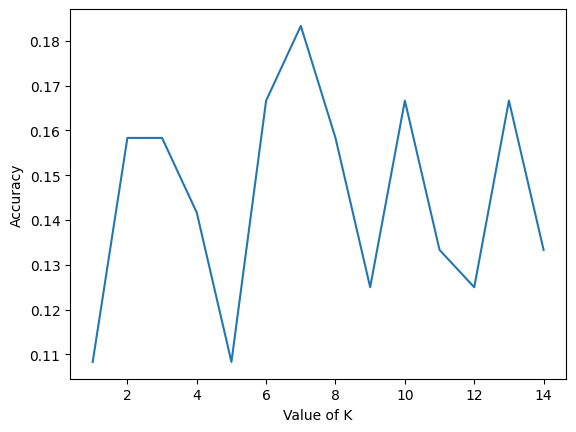

In [38]:
## Evaluating the model using KNeighborsClassifier method

# Specifying the range
range_k = range(1,15)
scores = {}
scores_list = []

for k in range_k:

    # Initialising the KNeighborsClassifier
   classifier = KNeighborsClassifier(n_neighbors=k)
    
    # fitting the model
   classifier.fit(X_train_scaled_LS_new, y_train_new)

    # Predicting the model with the test data
   y_pred_new = classifier.predict(X_test_new)

    # checking the accuracy
   scores[k] = metrics.accuracy_score(y_test_new,y_pred_new)
   scores_list.append(metrics.accuracy_score(y_test_new,y_pred_new))

# Confusion matrix
result = metrics.confusion_matrix(y_test_new, y_pred_new)
print("Confusion Matrix:")
print(result)

# Classification report
result1 = metrics.classification_report(y_test_new, y_pred_new)
print("Classification Report:",)
print (result1)

# Plotting the k-value with accuracy
plt.plot(range_k,scores_list)
plt.xlabel("Value of K")
plt.ylabel("Accuracy")

# classifier = KNeighborsClassifier(n_neighbors=8)
# classifier.fit(X_train_new, y_train_new)



##### Based on the plot we get a K-value of 8. Hence we are proceeding to choose n_neighbors as 8 in KNeighbors Classifier.

In [41]:
## Based on the plot choosing k=8

# Intialising KNeighbors Classifier
knn = KNeighborsClassifier(n_neighbors=8)

# Fiting the model
knn.fit(X_train_new, y_train_new)

# Predictng the model
y_pred1_new = knn.predict(X_test_new)

# Classification report
print(classification_report(y_test_new,y_pred1_new))

              precision    recall  f1-score   support

           1       0.40      0.36      0.38        22
           2       0.45      0.50      0.47        34
           3       0.48      0.57      0.52        47
           4       0.20      0.07      0.10        15
           5       0.00      0.00      0.00         2

    accuracy                           0.44       120
   macro avg       0.31      0.30      0.30       120
weighted avg       0.41      0.44      0.42       120



##### The Shopping_Satisfaction is rated from 1 to 5. The KNN classifier is able to predict class 3 better with precision of 0.48 and recall of 0.57 compared to other classes. Overall, the accuracy is 0.44 and it can be improved and hence analysing using other classifier models.

### Decision Tree Classifier

In [25]:
# Intialising decision tree classifier
dt_clf = DecisionTreeClassifier(random_state=20, max_depth=3)

# Fiting the model
dt_clf.fit(X_train_new, y_train_new)

# Predictng the model
y_pred_dt_clf = dt_clf.predict(X_test_new)
print(y_pred_dt_clf)

[2 1 2 3 2 2 2 2 2 2 2 1 1 3 1 2 2 3 2 3 2 1 3 2 3 2 3 3 2 2 3 1 3 3 4 3 3
 4 3 4 2 3 3 2 1 2 2 2 3 2 3 2 1 2 2 3 2 3 2 2 3 2 3 3 3 3 2 4 3 2 2 2 4 3
 3 4 2 4 3 3 2 2 3 3 3 3 3 3 4 3 3 3 3 2 3 2 3 3 2 2 2 3 3 3 2 1 1 1 2 2 3
 2 3 2 2 4 3 1 2 3]


In [26]:
# Classification report
print(classification_report(y_test_new,y_pred_dt_clf))

              precision    recall  f1-score   support

           1       0.42      0.23      0.29        22
           2       0.47      0.68      0.55        34
           3       0.54      0.57      0.56        47
           4       0.22      0.13      0.17        15
           5       0.00      0.00      0.00         2

    accuracy                           0.48       120
   macro avg       0.33      0.32      0.31       120
weighted avg       0.45      0.47      0.45       120



/Users/manickashree/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/manickashree/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/manickashree/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(r

##### From the classification report of Decision Tree classifier, we notice there is improvement in the overall model accuracy which is 0.48. Also all classes except class 5, has better precision compared to KNN classifier. However, this can be improved further hence proceeding with Random Forest Classifier.

### Random Forest Classifier

In [27]:
# Intialising Random Forest classifier with min_samples_split of 5

rf_clf = RandomForestClassifier(min_samples_split= 5)

# Fiting the model
rf_clf.fit(X_train_new,y_train_new)

# Predictng the model
y_pred_rf_clf = rf_clf.predict(X_test_new)
print(y_pred_rf_clf)

# Classification report
print(classification_report(y_test_new, y_pred_rf_clf))

[2 2 2 3 3 2 2 2 2 1 2 1 1 3 1 2 2 3 3 3 2 1 3 2 3 2 3 3 2 2 3 1 3 3 4 3 3
 4 3 4 2 2 3 3 1 2 2 2 3 2 3 2 2 1 1 3 1 3 2 1 3 2 3 3 3 3 2 4 3 1 2 2 2 3
 3 4 2 4 3 3 2 2 3 3 3 3 2 3 4 3 3 2 3 3 3 1 2 2 2 2 1 2 3 3 1 1 2 2 3 2 3
 1 3 3 2 2 3 1 2 3]
              precision    recall  f1-score   support

           1       0.50      0.41      0.45        22
           2       0.47      0.62      0.53        34
           3       0.54      0.57      0.56        47
           4       0.29      0.13      0.18        15
           5       0.00      0.00      0.00         2

    accuracy                           0.49       120
   macro avg       0.36      0.35      0.34       120
weighted avg       0.47      0.49      0.47       120



/Users/manickashree/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/manickashree/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/manickashree/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(r

##### From the classification report of Random Forest classifier, we notice there is improvement in the overall model accuracy which is 0.49. Also all classes except class 5, has better precision and recall compared to the previous two classifiers. However, this can be improved further hence proceed to check the performace of XGBoost Classifier.

### XGBoost Classifier

In [44]:
## Since by default, XGBoost assumes input categories are integers starting from 0 we are doing the required adjustements.
y_train_new_adjusted = y_train_new - 1
y_test_new_adjusted = y_test_new - 1

# Intialising XG Boost classifier
xgb_clf = XGBClassifier()

# Fiting the model
xgb_clf.fit(X_train_new,y_train_new_adjusted)

# Predictng the model
y_pred_xgb_clf = xgb_clf.predict(X_test_new)
print(y_pred_xgb_clf)

# Classification report
print(classification_report(y_test_new_adjusted, y_pred_xgb_clf))


# Adjusting predicted labels back to original
# y_pred_xgb_clf_adjusted = y_pred_xgb_clf + 1

# print(y_pred_xgb_clf_adjusted)
# print(classification_report(y_test_new_adjusted, y_pred_xgb_clf_adjusted))


[1 1 1 2 2 1 1 2 1 0 3 0 0 2 0 0 1 2 0 1 1 0 4 1 2 1 2 2 0 1 1 0 2 2 0 2 2
 3 2 3 0 1 2 2 0 1 0 1 2 1 2 1 1 0 0 2 0 2 1 0 3 1 2 2 2 2 1 3 1 0 2 1 1 2
 2 3 1 3 2 2 1 1 2 3 2 2 1 2 3 1 2 1 2 1 2 0 1 1 1 2 0 1 2 2 0 0 1 0 3 1 2
 0 2 2 1 0 4 1 1 1]
              precision    recall  f1-score   support

           0       0.40      0.45      0.43        22
           1       0.48      0.59      0.53        34
           2       0.56      0.49      0.52        47
           3       0.30      0.20      0.24        15
           4       0.00      0.00      0.00         2

    accuracy                           0.47       120
   macro avg       0.35      0.35      0.34       120
weighted avg       0.47      0.47      0.46       120



##### The performance of XGBoost is not as good as Random forest claasifier as the precision and recall of all classed are less compared to the Random forest claasifier with overall model accuaracy of 0.47.  Hence we are choosing Random forest claasifier.

### Unsupervised Learning 
### K-mean clustering

In [67]:
amazon_data1 = pd.read_csv('Amazon Customer Behavior Survey.csv')

amazon_data1.head()


,Timestamp,age,Gender,Purchase_Frequency,Purchase_Categories,Personalized_Recommendation_Frequency,Browsing_Frequency,Product_Search_Method,Search_Result_Exploration,Customer_Reviews_Importance,...,Saveforlater_Frequency,Review_Left,Review_Reliability,Review_Helpfulness,Personalized_Recommendation_Frequency,Recommendation_Helpfulness,Rating_Accuracy,Shopping_Satisfaction,Service_Appreciation,Improvement_Areas
0,2023/06/04 1:28:19 PM GMT+5:30,23,Female,Few times a month,Beauty and Personal Care,Yes,Few times a week,Keyword,Multiple pages,1,...,Sometimes,Yes,Occasionally,Yes,2,Yes,1,1,Competitive prices,Reducing packaging waste
1,2023/06/04 2:30:44 PM GMT+5:30,23,Female,Once a month,Clothing and Fashion,Yes,Few times a month,Keyword,Multiple pages,1,...,Rarely,No,Heavily,Yes,2,Sometimes,3,2,Wide product selection,Reducing packaging waste
2,2023/06/04 5:04:56 PM GMT+5:30,24,Prefer not to say,Few times a month,Groceries and Gourmet Food;Clothing and Fashion,No,Few times a month,Keyword,Multiple pages,2,...,Rarely,No,Occasionally,No,4,No,3,3,Competitive prices,Product quality and accuracy
3,2023/06/04 5:13:00 PM GMT+5:30,24,Female,Once a month,Beauty and Personal Care;Clothing and Fashion;...,Sometimes,Few times a month,Keyword,First page,5,...,Sometimes,Yes,Heavily,Yes,3,Sometimes,3,4,Competitive prices,Product quality and accuracy
4,2023/06/04 5:28:06 PM GMT+5:30,22,Female,Less than once a month,Beauty and Personal Care;Clothing and Fashion,Yes,Few times a month,Filter,Multiple pages,1,...,Rarely,No,Heavily,Yes,4,Yes,2,2,Competitive prices,Product quality and accuracy


Product_Search_Method    2
Shopping_Satisfaction    0
dtype: int64


/Users/manickashree/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/manickashree/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/manickashree/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/manickashree/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: 

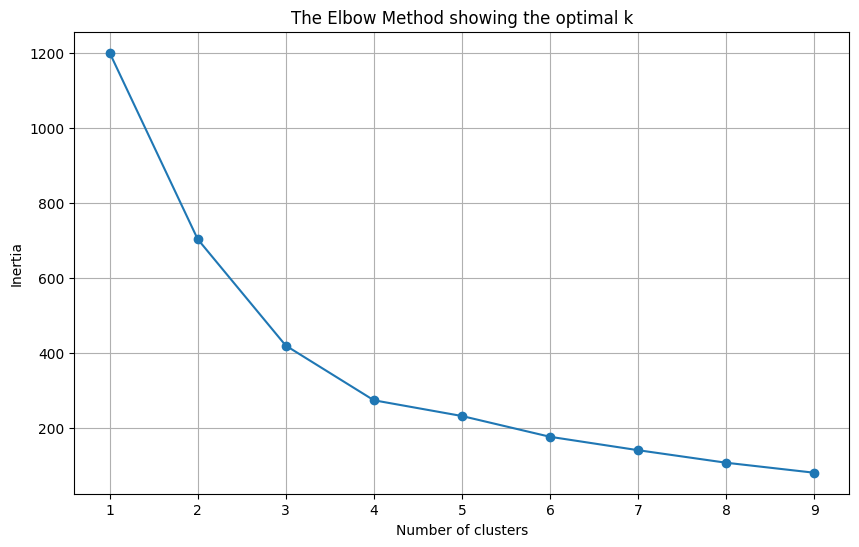

In [68]:
### Creating clusters using Product_Search_Method and Shopping_Satisfaction.
# Encoding "Product_Search_Method" 
Product_Search_Method_Mapping = {
    'others': 1,
    'Keyword': 2,
    'Filter': 3,
    'categories': 4
}

amazon_data1['Product_Search_Method'] = amazon_data1['Product_Search_Method'].map(Product_Search_Method_Mapping)

print(amazon_data1[['Product_Search_Method', 'Shopping_Satisfaction']].isna().sum())


# Extract the variables
X_clustering = amazon_data1[['Product_Search_Method', 'Shopping_Satisfaction']].dropna()

# Standardize the features
scaler = StandardScaler()
X_clustering_standardized = scaler.fit_transform(X_clustering)

# Find the optimal number of clusters with Elbow Plot
inertia = []
K_range = range(1, 10)  

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_clustering_standardized)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Plot
plt.figure(figsize=(10, 6))
plt.plot(K_range, inertia, '-o')
plt.title('The Elbow Method showing the optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.xticks(K_range)
plt.grid(True)
plt.show()


##### From the elbow plot we can infer that the optimal number of clusters for this dataset is 4. Hence we will be performing K-means with  k = 4.

/Users/manickashree/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


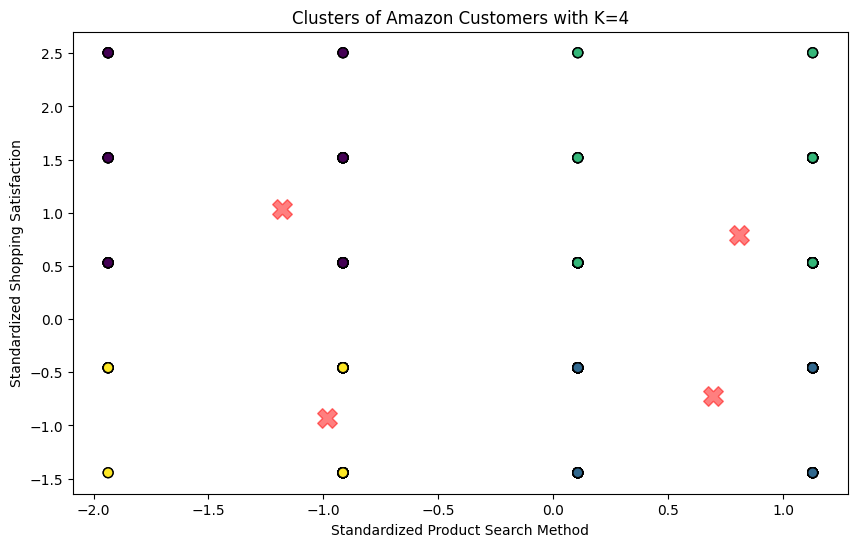

In [74]:
# Perform K-means cluster with K = 4
kmeans_optimal = KMeans(n_clusters=4, random_state=42)
kmeans_optimal.fit(X_clustering_standardized)
cluster_labels = kmeans_optimal.labels_

# cluster_colors = amazon_data1['Product_Search_Method'].map({1: 'yellow', 2: 'Green',3: 'Blue', 4: 'Purple'}).tolist() 

# Ploting the clusters
plt.figure(figsize=(10, 6))
plt.scatter(X_clustering_standardized[:, 0], X_clustering_standardized[:, 1], c=cluster_labels, cmap='viridis', marker='o', edgecolor='black', s=50)
plt.title('Clusters of Amazon Customers with K=4')
plt.xlabel('Standardized Product Search Method')
plt.ylabel('Standardized Shopping Satisfaction')
centers = kmeans_optimal.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5, marker='X')  # Mark cluster centers
plt.show()


#### Yellow group: Customers in this group may have used other search methods than keywords, filters, and categories. They showed relatively low scores on search satisfaction, which may mean that this search method did not give them a satisfactory shopping experience.

#### Purple group: These customers may use category search methods more and score lower on shopping satisfaction, possibly indicating that even if they search specifically for a category, they may not always find a product that satisfies them.

#### Blue group: Customers in this group may tend to use filters for product searches and exhibit higher scores on shopping satisfaction, suggesting that using filters for search may be associated with higher satisfaction.

#### Green group: This group may be more likely to use keyword searches, and their satisfaction scores span a wide range, indicating that even with clear search intent, satisfaction may vary from person to person.

##### The plot shows the clustering of Amazon customers based on their standardized product search method and shopping satisfaction, using K-means with k = 4 clusters. The data points are colored based on their cluster assignment, and the red X marks represent the centroids of the clusters. The plot suggests that there are distinct groups of customers with varying levels of satisfaction and preferences for product search methods, which could be leveraged for targeted marketing strategies.

##### Hence we can infer that the Random Forest Classifier is able to clasify customer satisfication better compared to other models.